In [14]:
!pip install fbprophet 
#jupyter安装fbprophet，需要在前面加“！”
import pandas as pd
#数据加载
train= pd.read_csv('train.csv')#在同一个目录下，不加./也行
print(train.head())

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2


In [15]:
train['Datetime']=pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M' ) #转换为pandas里的日期格式
train.index = train.Datetime #将Datetime作为train的索引
print(train.head())

                     ID            Datetime  Count
Datetime                                          
2012-08-25 00:00:00   0 2012-08-25 00:00:00      8
2012-08-25 01:00:00   1 2012-08-25 01:00:00      2
2012-08-25 02:00:00   2 2012-08-25 02:00:00      6
2012-08-25 03:00:00   3 2012-08-25 03:00:00      2
2012-08-25 04:00:00   4 2012-08-25 04:00:00      2


In [16]:
train.drop(['ID','Datetime'],axis=1,inplace=True)#去掉ID DATetIME字段，inplace=True表示原地替换
#或 trian= train.drop(['ID','Datetime'])
print(train.head())

                     Count
Datetime                  
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2


In [17]:
daily_train = train.resample('D').sum() #按照天来采样，不管小时分钟
print(daily_train.head()) 
daily_train['ds']=daily_train.index #把index替换成ds
daily_train['y']=daily_train.Count #把Count替换成y
daily_train.drop(['Count'],axis=1, inplace=True) 
print(daily_train.head()) 

            Count
Datetime         
2012-08-25     76
2012-08-26     88
2012-08-27     62
2012-08-28     58
2012-08-29     60
                   ds   y
Datetime                 
2012-08-25 2012-08-25  76
2012-08-26 2012-08-26  88
2012-08-27 2012-08-27  62
2012-08-28 2012-08-28  58
2012-08-29 2012-08-29  60


In [20]:
from fbprophet import Prophet
m = Prophet(yearly_seasonality=True, holidays=holidays, seasonality_prior_scale=0.1)
# m = Prophet(holidays=holidays)
m.fit(daily_train)
future = m.make_future_dataframe(periods=213)# 预测未来7个月，213天
forecast= m.predict(future)
print(forecast)

NameError: name 'holidays' is not defined

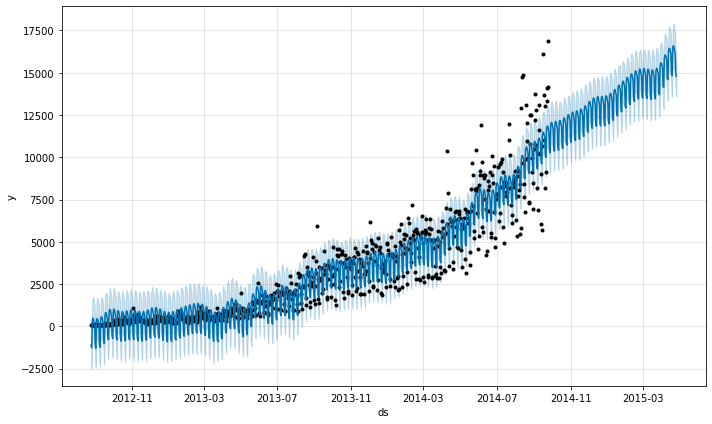

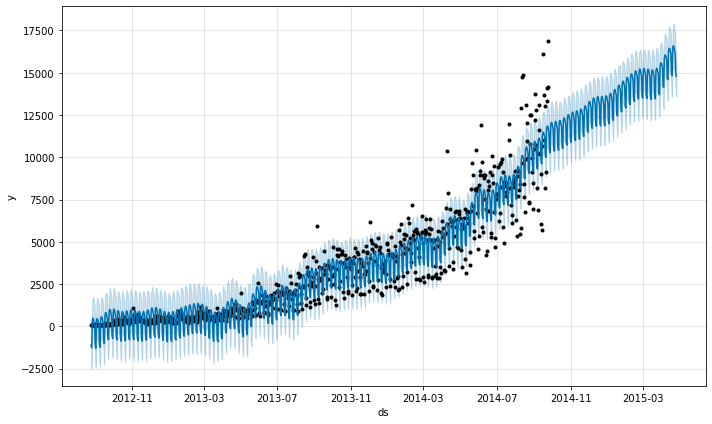

In [11]:
m.plot(forecast)

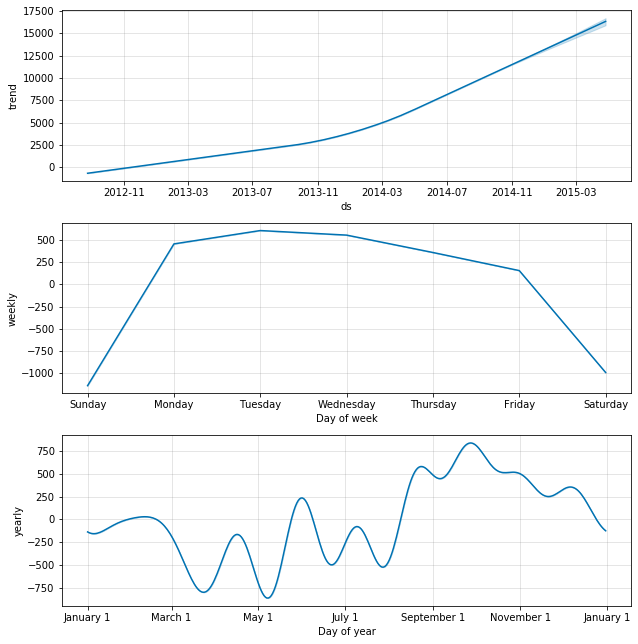

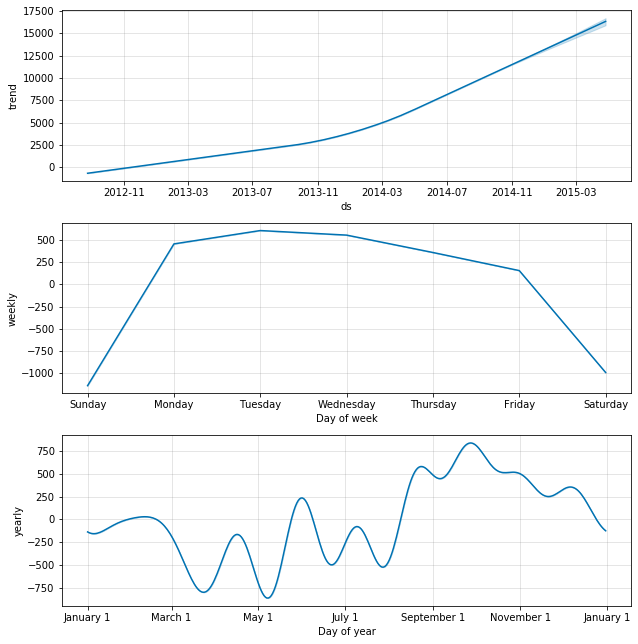

In [12]:
m.plot_components(forecast)#查看各个成分